In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('Leads.csv')

# Display the first few rows of the dataset
df.head()


,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [43]:
# Get an overview of the data (number of rows, columns, data types)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [44]:
# Check for missing values
df.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [45]:
# Handle missing values
# Drop columns with a large number of missing values
df = df.drop(columns=['Country', 'What is your current occupation', 'What matters most to you in choosing a course', 'Tags', 'Lead Quality', 'Asymmetrique Activity Index', 'Asymmetrique Profile Index', 'Asymmetrique Activity Score', 'Asymmetrique Profile Score'])

# Handle 'Select' values in categorical variables
df = df.replace('Select', np.nan)

# Drop rows with missing values
df = df.dropna()

# Confirm no missing values remain
print(df.isnull().sum())


Prospect ID                                 0
Lead Number                                 0
Lead Origin                                 0
Lead Source                                 0
Do Not Email                                0
Do Not Call                                 0
Converted                                   0
TotalVisits                                 0
Total Time Spent on Website                 0
Page Views Per Visit                        0
Last Activity                               0
Specialization                              0
How did you hear about X Education          0
Search                                      0
Magazine                                    0
Newspaper Article                           0
X Education Forums                          0
Newspaper                                   0
Digital Advertisement                       0
Through Recommendations                     0
Receive More Updates About Our Courses      0
Update me on Supply Chain Content 

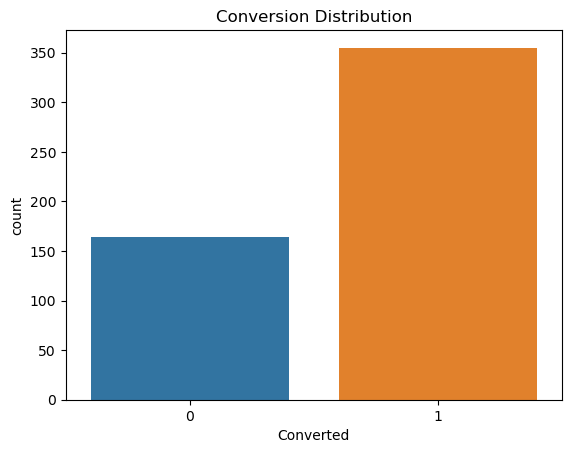

In [46]:
# Plot the distribution of the target variable
sns.countplot(x='Converted', data=df)
plt.title('Conversion Distribution')
plt.show()



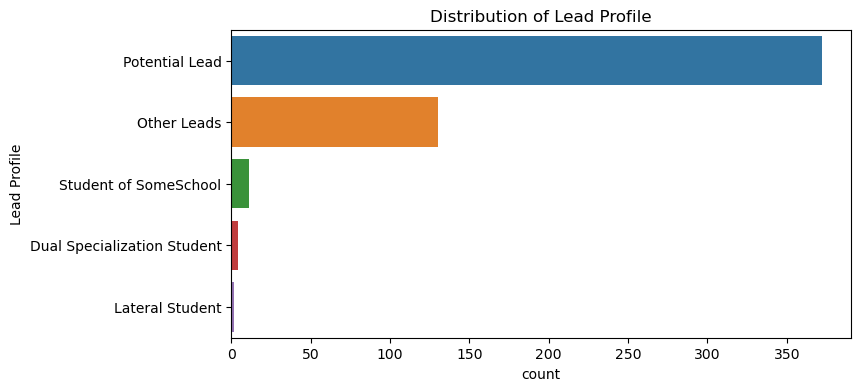

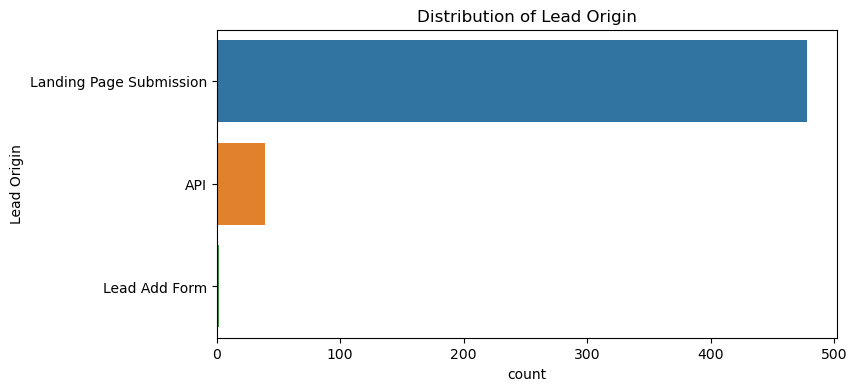

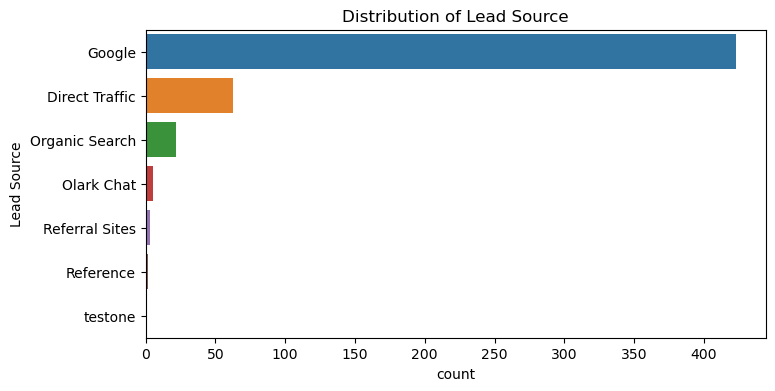

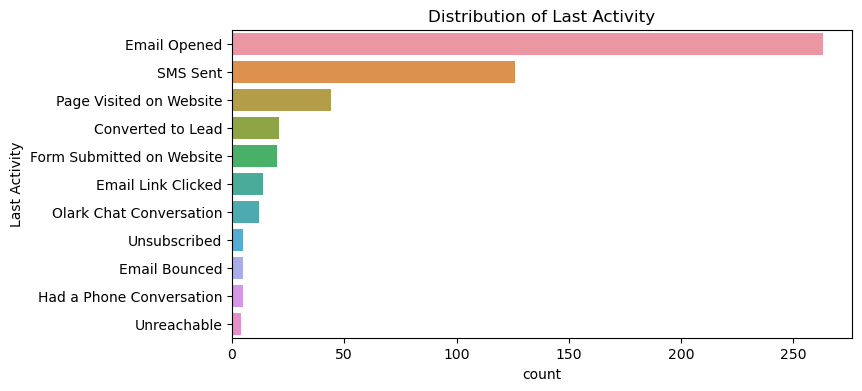

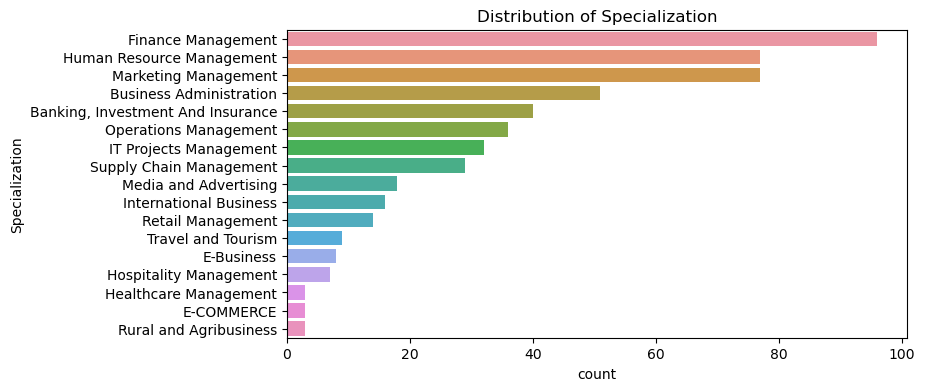

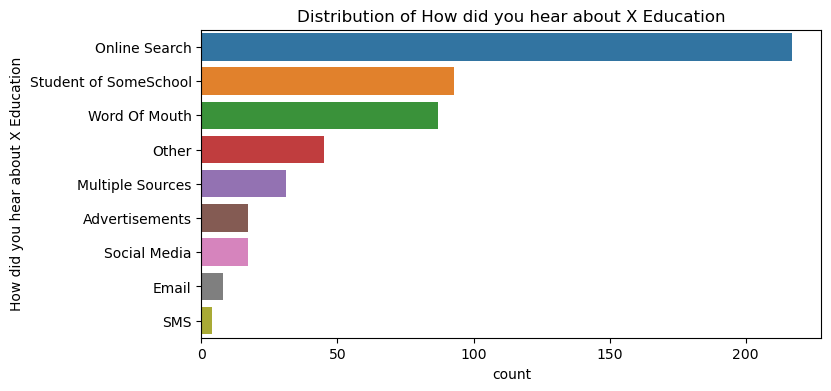

In [47]:

# Plot the distribution of categorical features
categorical_features = ['Lead Profile','Lead Origin', 'Lead Source', 'Last Activity', 'Specialization', 'How did you hear about X Education']

for feature in categorical_features:
    plt.figure(figsize=(8, 4))
    sns.countplot(y=feature, data=df, order=df[feature].value_counts().index)
    plt.title(f'Distribution of {feature}')
    plt.show()


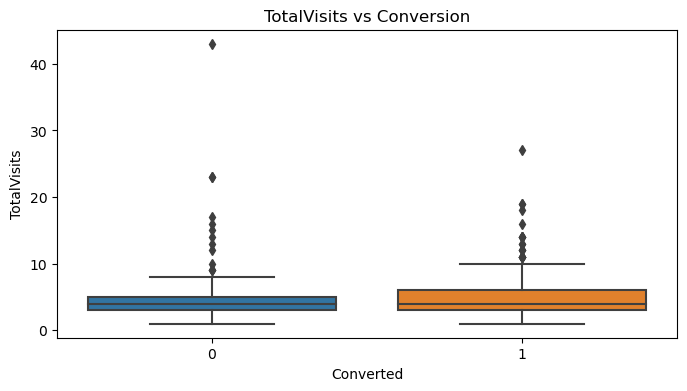

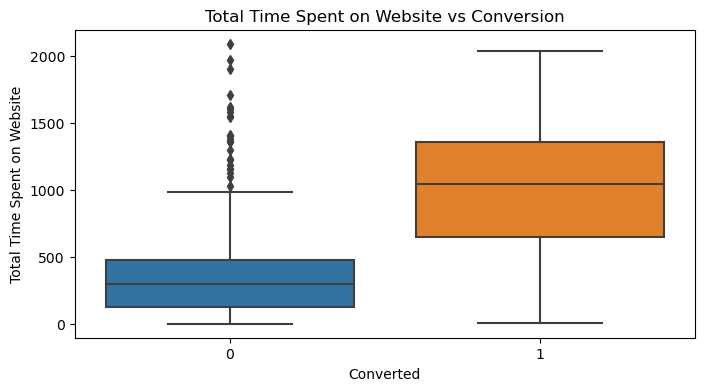

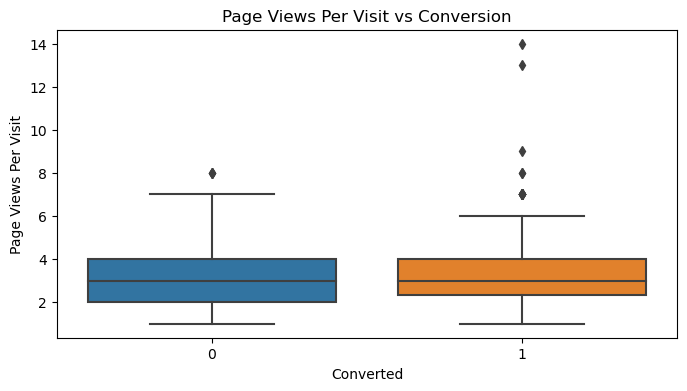

In [48]:
# Plot the relationship between numerical features and the target
numerical_features = ['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']

for feature in numerical_features:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x='Converted', y=feature, data=df)
    plt.title(f'{feature} vs Conversion')
    plt.show()

In [49]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Check current columns
print(df.columns)

# One-hot encode categorical variables
categorical_features = df.select_dtypes(include=['object']).columns.tolist()
df = pd.get_dummies(df, columns=categorical_features, drop_first=True)

# Standardize numerical features
numerical_features = ['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']
scaler = StandardScaler()
df[numerical_features] = scaler.fit_transform(df[numerical_features])

# Ensure the target variable is not part of the feature set
if 'Converted' in df.columns:
    y = df['Converted']
    X = df.drop(columns=['Converted'])
else:
    raise KeyError("The target variable 'Converted' is missing from the dataset.")

# Check if 'Prospect ID' and 'Lead Number' are present in columns to drop
columns_to_drop = ['Prospect ID', 'Lead Number']
for col in columns_to_drop:
    if col in X.columns:
        X = X.drop(columns=[col])

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the data types to ensure everything is numeric
print(X_train.dtypes)


Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Specialization', 'How did you hear about X Education', 'Search',
       'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')
TotalVisits                                         float64
Total Time Spent on Website                         float64
Page Views Per Visit                                float64
Prospect ID_00fd9191-ba69-48be-8f21-e50b89802b0b       bool
Prospect ID_016fa193-dd06-4cc1-94d2-413dabda57d

Confusion Matrix:
[[18 18]
 [ 7 61]]
Accuracy: 0.7596153846153846
ROC AUC Score: 0.8345588235294117


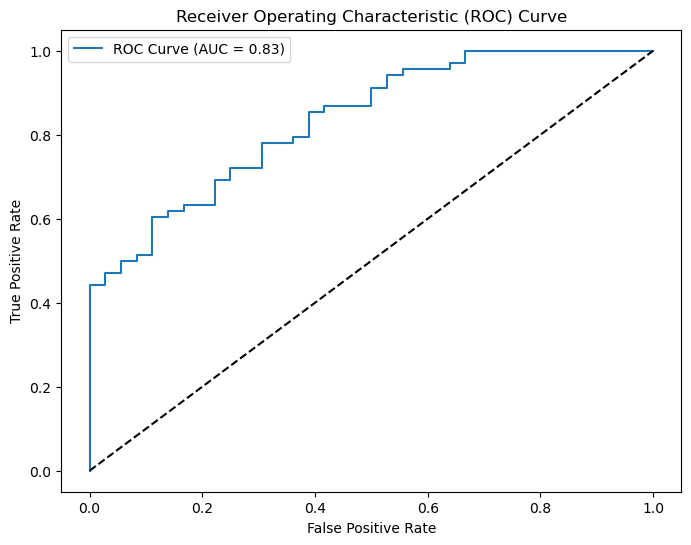

,Lead Number,Lead Score
6,660673,97.251182
22,660471,85.973556
27,660424,96.784473
37,660267,86.694010
39,660236,77.661313


In [60]:
# Build the logistic regression model
model = LogisticRegression(random_state=42, max_iter=1000)
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]

# Evaluate the model
conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

print('Confusion Matrix:')
print(conf_matrix)
print(f'Accuracy: {accuracy}')
print(f'ROC AUC Score: {roc_auc}')

# Plot the ROC curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

# Assign lead scores
lead_scores = model.predict_proba(X)[:, 1] * 100
df['Lead Score'] = lead_scores

# Display the first few leads with their scores
df[['Lead Number','Lead Score']].head()


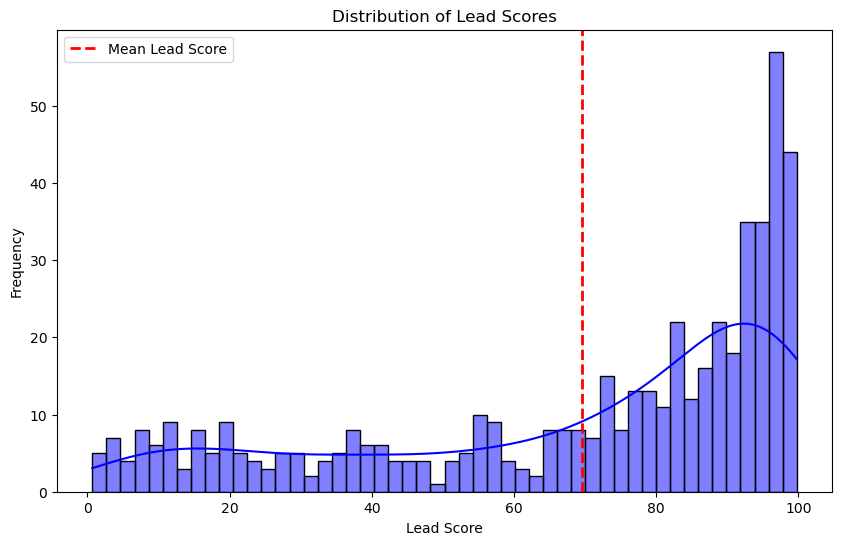

In [61]:
# Plotting the distribution of lead scores
plt.figure(figsize=(10, 6))
sns.histplot(df['Lead Score'], bins=50, kde=True, color='blue')
plt.title('Distribution of Lead Scores')
plt.xlabel('Lead Score')
plt.ylabel('Frequency')
plt.axvline(df['Lead Score'].mean(), color='red', linestyle='dashed', linewidth=2, label='Mean Lead Score')
plt.legend()
plt.show()

In [51]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid, ensuring valid combinations
param_grid = [
    {'penalty': ['l2', 'none'], 'C': [0.01, 0.1, 1, 10, 100], 'solver': ['lbfgs'], 'max_iter': [100, 500, 1000]},
    {'penalty': ['l1', 'l2'], 'C': [0.01, 0.1, 1, 10, 100], 'solver': ['liblinear'], 'max_iter': [100, 500, 1000]},
    {'penalty': ['l1', 'l2', 'elasticnet'], 'C': [0.01, 0.1, 1, 10, 100], 'solver': ['saga'], 'max_iter': [100, 500, 1000], 'l1_ratio': [0.5]}
]

# Create the GridSearchCV object
grid_search = GridSearchCV(LogisticRegression(random_state=42), param_grid, cv=5, scoring='roc_auc', n_jobs=-1)

# Fit the model to find the best parameters
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print(f'Best parameters: {best_params}')

# Build the final model with the best parameters
final_model = LogisticRegression(**best_params, random_state=42)
final_model.fit(X_train, y_train)

# Predict on the test set
y_pred = final_model.predict(X_test)
y_pred_proba = final_model.predict_proba(X_test)[:, 1]

# Evaluate the final model
conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

print('Confusion Matrix:')
print(conf_matrix)
print(f'Accuracy: {accuracy}')
print(f'ROC AUC Score: {roc_auc}')


Best parameters: {'C': 0.1, 'max_iter': 100, 'penalty': 'l1', 'solver': 'liblinear'}
Confusion Matrix:
[[13 23]
 [ 3 65]]
Accuracy: 0.75
ROC AUC Score: 0.8511029411764706


In [53]:
import numpy as np

# Get the coefficients of the features
coefficients = final_model.coef_[0]

# Create a DataFrame to hold the feature names and their importance
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': coefficients
})

# Sort the DataFrame by the absolute value of the coefficients
feature_importance['Absolute Importance'] = np.abs(feature_importance['Importance'])
feature_importance = feature_importance.sort_values(by='Absolute Importance', ascending=False)

# Display the top 10 features
print(feature_importance.head(10))


                                              Feature  Importance  \
566                       Lead Profile_Potential Lead    1.417619   
1                         Total Time Spent on Website    1.001547   
574                Last Notable Activity_Email Opened    0.011637   
0                                         TotalVisits    0.000000   
390  Prospect ID_c232bcdc-46f9-4ee2-8bd3-b2bfb62e4d0b    0.000000   
384  Prospect ID_bffe92b7-0a85-423a-8ae3-21e3d7fbcf25    0.000000   
385  Prospect ID_c0856353-5b9f-4219-b544-dd3b27e0472e    0.000000   
386  Prospect ID_c0b099d8-3e41-406f-8f57-40d841197590    0.000000   
387  Prospect ID_c167a670-ea3d-454a-bfc1-84d5c4d48d09    0.000000   
388  Prospect ID_c1b12959-1449-43be-8184-cfafe0b11675    0.000000   

     Absolute Importance  
566             1.417619  
1               1.001547  
574             0.011637  
0               0.000000  
390             0.000000  
384             0.000000  
385             0.000000  
386             0.000000

In [54]:
# Interpret the logistic regression coefficients
feature_importance['Impact'] = np.where(feature_importance['Importance'] > 0, 'Positive', 'Negative')

# Display the features with their impact
print(feature_importance[['Feature', 'Importance', 'Impact']].head(10))


                                              Feature  Importance    Impact
566                       Lead Profile_Potential Lead    1.417619  Positive
1                         Total Time Spent on Website    1.001547  Positive
574                Last Notable Activity_Email Opened    0.011637  Positive
0                                         TotalVisits    0.000000  Negative
390  Prospect ID_c232bcdc-46f9-4ee2-8bd3-b2bfb62e4d0b    0.000000  Negative
384  Prospect ID_bffe92b7-0a85-423a-8ae3-21e3d7fbcf25    0.000000  Negative
385  Prospect ID_c0856353-5b9f-4219-b544-dd3b27e0472e    0.000000  Negative
386  Prospect ID_c0b099d8-3e41-406f-8f57-40d841197590    0.000000  Negative
387  Prospect ID_c167a670-ea3d-454a-bfc1-84d5c4d48d09    0.000000  Negative
388  Prospect ID_c1b12959-1449-43be-8184-cfafe0b11675    0.000000  Negative


In [55]:
import joblib

# Save the final model to a file
joblib.dump(final_model, 'final_lead_scoring_model.pkl')


['final_lead_scoring_model.pkl']

In [56]:
# Assuming your model is already trained and you have test data
import pandas as pd

# Predict probabilities
lead_probabilities = model.predict_proba(X_test)[:, 1]

# Scale probabilities to a 0-100 lead score
lead_scores = lead_probabilities * 100

# Add the lead scores to your test set for review
X_test_with_scores = X_test.copy()
X_test_with_scores['Lead Score'] = lead_scores

# Display the lead scores
print(X_test_with_scores[['Lead Score']].head())


      Lead Score
4937    9.059144
1905   79.727838
56     83.196353
2881    8.886580
1869   85.566303


In [57]:
df.head()


,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Prospect ID_00fd9191-ba69-48be-8f21-e50b89802b0b,Prospect ID_016fa193-dd06-4cc1-94d2-413dabda57d8,Prospect ID_01c951dd-cebb-4d54-8d06-4b9f3919d0c7,Prospect ID_01cb6c3a-4870-4d8e-ab0c-0ec09dfa08bb,Prospect ID_026ef78b-c843-4c87-9f3a-d6dbcfa4b255,...,A free copy of Mastering The Interview_Yes,Last Notable Activity_Email Opened,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Lead Score
6,660673,1,-0.884260,1.499290,-0.893657,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,97.251182
22,660471,1,-1.168077,0.360082,-1.530336,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,85.973556
27,660424,1,0.251005,0.908792,1.653059,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,96.784473
37,660267,1,-0.032811,-0.457531,1.016380,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,86.694010
39,660236,1,-0.316628,-1.435033,0.379701,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,77.661313
